In [1]:
%load_ext autoreload
%autoreload 2
from src.datasets import *
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import torch

In [2]:
warpdataset = WarpDataset(body_seg_dir='data/deep_fashion_all/body_128',
                         cloth_seg_dir='data/deep_fashion_all/clothing_128',
                         input_transform=swapnet_random_transform,
                         inference_mode=False,
                         )

In [3]:
# os.makedirs('data/deep_fashion/body/MEN/Pants/id_00007323/')
# a = np.random.randint(0,256, (20,20,3), dtype=np.uint8)
# a = Image.fromarray(a)
# a.save('data/deep_fashion/body/MEN/Pants/id_00007323/04_2_size.png', 'PNG')
from scipy.sparse import load_npz
a = load_npz('data/deep_fashion/clothing/WOMEN/Tees_Tanks/id_00000007/01_1_front.npz')
np.unique(a.todense().tolist())

array([ 0,  2,  4, 11, 12, 13, 14, 15, 16])

In [4]:
input_body, input_cloth, target_cloth = warpdataset[100]

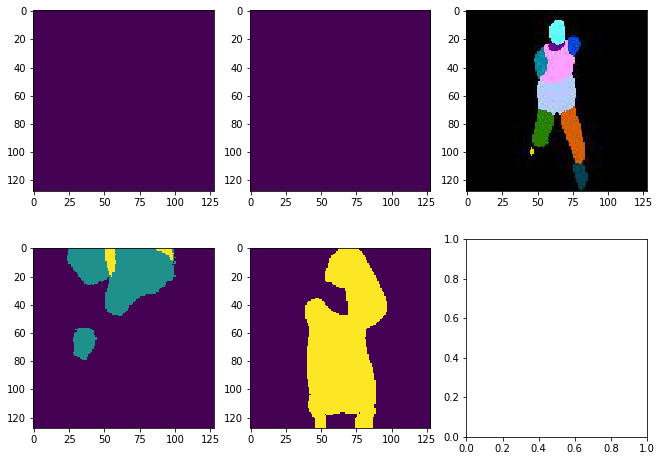

In [5]:
fig, ax = plt.subplots(2,3)
fig.set_size_inches(11,8)

ax[0,0].imshow(input_cloth[4])
ax[0,1].imshow(target_cloth[4])
ax[0,2].imshow(input_body.numpy().transpose(1,2,0))
ax[1,0].imshow(input_cloth.sum(0))
ax[1,1].imshow(target_cloth.sum(0))

In [6]:
warpdataset = WarpDataset(body_seg_dir='data/deep_fashion_all/body_128',
                         cloth_seg_dir='data/deep_fashion_all/clothing_128',
                         input_transform=swapnet_random_transform,
                         inference_mode=True,
                         )

In [7]:
input_body, input_cloth = warpdataset[1]

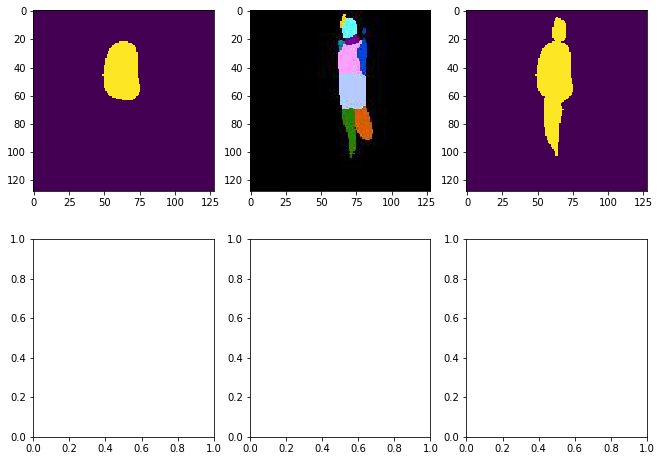

In [8]:
fig, ax = plt.subplots(2,3)
fig.set_size_inches(11,8)

ax[0,0].imshow(input_cloth[4])
ax[0,1].imshow(input_body.numpy().transpose(1,2,0))
ax[0,2].imshow(input_cloth.sum(0))


In [12]:
texturedataset = TextureDataset(texture_dir='data/deep_fashion_all/texture_128',
                                 cloth_seg_dir='data/deep_fashion_all/clothing_128',
                                rois_db='data/deep_fashion_all/rois.csv'
                               )
len(texturedataset)

52712

In [14]:
input_texture, input_rois, input_cloth, output_texture = texturedataset[1]

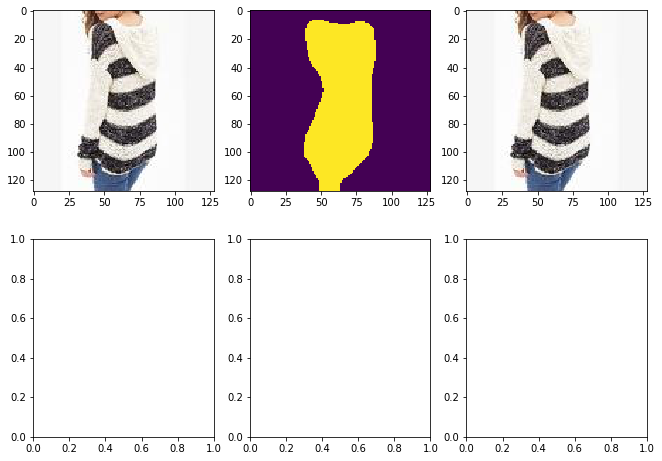

In [15]:
fig, ax = plt.subplots(2,3)
fig.set_size_inches(11,8)

ax[0,0].imshow(input_texture.numpy().transpose(1,2,0))
ax[0,1].imshow(input_cloth.sum(0))
ax[0,2].imshow(output_texture.numpy().transpose(1,2,0))